In [42]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

# split score_df
score_df = pd.read_csv("score.csv")
X = pd.get_dummies(score_df[[
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
        'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']])
Y = score_df['target']

#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, stratify=Y, 
        test_size=0.25, random_state=1)

In [43]:
print("X Train size: ", X_train.shape, "\nX Test size: ", X_test.shape)
print("Y Train size: ", Y_test.shape, "\nY Test size: ", Y_test.shape)

X Train size:  (456, 11) 
X Test size:  (153, 11)
Y Train size:  (153,) 
Y Test size:  (153,)


In [44]:
# feature scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)                     
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [48]:
# Bagged-based Ensenble using Decision Trees for classification
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# # Decision tree
# cart = DecisionTreeClassifier()
# num_trees = 50

# # create the sub models using multiple Decision Trees, e.g. 100 trees
# es_Bag = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=7)

# # Boosting-based Ensemble using AdaBoost Classification wiht Decision Trees
# from sklearn.ensemble import AdaBoostClassifier
# num_trees = 50

# # create the sub models using multiple Decision Trees, e.g. 100 trees
# es_Boost = AdaBoostClassifier(n_estimators=num_trees, random_state=7)

# Voting-based Ensemble for Classification using various methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import VotingClassifier

# create the sub models using LogisticRegression, DecisionTree, and SupportVector
estimators = []
model1 = LogisticRegression(random_state=7)  # Logistic Regression Classifier
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(random_state=7) # Decision Tree Classifier
estimators.append(('cart', model2))
model3 = SVC(random_state=7) #Support Vector Classifier
estimators.append(('svc', model3))

# create the ensemble model
es_Vote = VotingClassifier(estimators)

# Model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, accuracy_score, confusion_matrix
# use for-loop to print the performance of each ensemble model
# for model in (es_Bag, es_Boost, es_Vote):
#         model.fit(X_train, Y_train)
#         y_predict = model.predict(X_test)       
#         print(model.__class__.__name__, ' Ensemble accuracy: ', metrics.accuracy_score(Y_test, y_predict))

es_Vote.fit(X_train, Y_train)
y_predict = es_Vote.predict(X_test)      

cm=confusion_matrix(Y_test, y_predict)
TP = cm[0][0]
FP = cm[0][1]
FN=cm[1][0]
TN=cm[1][1]

print("TP: ", TP, '\nFP: ', FP, '\nFN: ', FN, '\nTN: ', TN)

print(es_Vote.__class__.__name__, 
      '\nEnsemble accuracy: ', accuracy_score(Y_test, y_predict),
      '\nEnsemble precision: ', TP/(TP+FP),
      '\nEnsemble recall: ', TP/(TP+FN),
      '\nEnsemble specificity: ', TN/(TN+FP),
      '\nEnsemble misclassification: ', 1-accuracy_score(Y_test, y_predict)
      )

TP:  108 
FP:  0 
FN:  0 
TN:  45
VotingClassifier 
Ensemble accuracy:  1.0 
Ensemble precision:  1.0 
Ensemble recall:  1.0 
Ensemble specificity:  1.0 
Ensemble misclassification:  0.0


In [38]:
#LogisticRegression

import numpy as np

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear', random_state=7, max_iter=300)
lg.fit(X_train, Y_train)

# obtain the model intercept and coefficient of each input attribute
print(f"intercept: {np.round(lg.intercept_,4)}")
fieldList = np.array(list(X)).reshape(-1,1)
coeffs = np.reshape(np.round(lg.coef_,2),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
print(pd.DataFrame(coeffs,columns=['Attribute','Coefficient']))

# fit the model to compare predicted and actual target output values
y_predict = lg.predict(X_test)      

# assess the model permance
from sklearn import metrics 
print("Model Accuracy     : ", round(metrics.accuracy_score(Y_test, y_predict),10))

intercept: [-3.7129]
    Attribute Coefficient
0    A1_Score        0.96
1    A2_Score        0.95
2    A3_Score        0.82
3    A4_Score        0.97
4    A5_Score        1.07
5    A6_Score        1.01
6    A7_Score        1.13
7    A8_Score        1.06
8    A9_Score        1.24
9   A10_Score        0.59
10        sum        1.86
Model Accuracy     :  1.0


Mean Squared Error (MSE):  0.0


<Figure size 640x480 with 0 Axes>

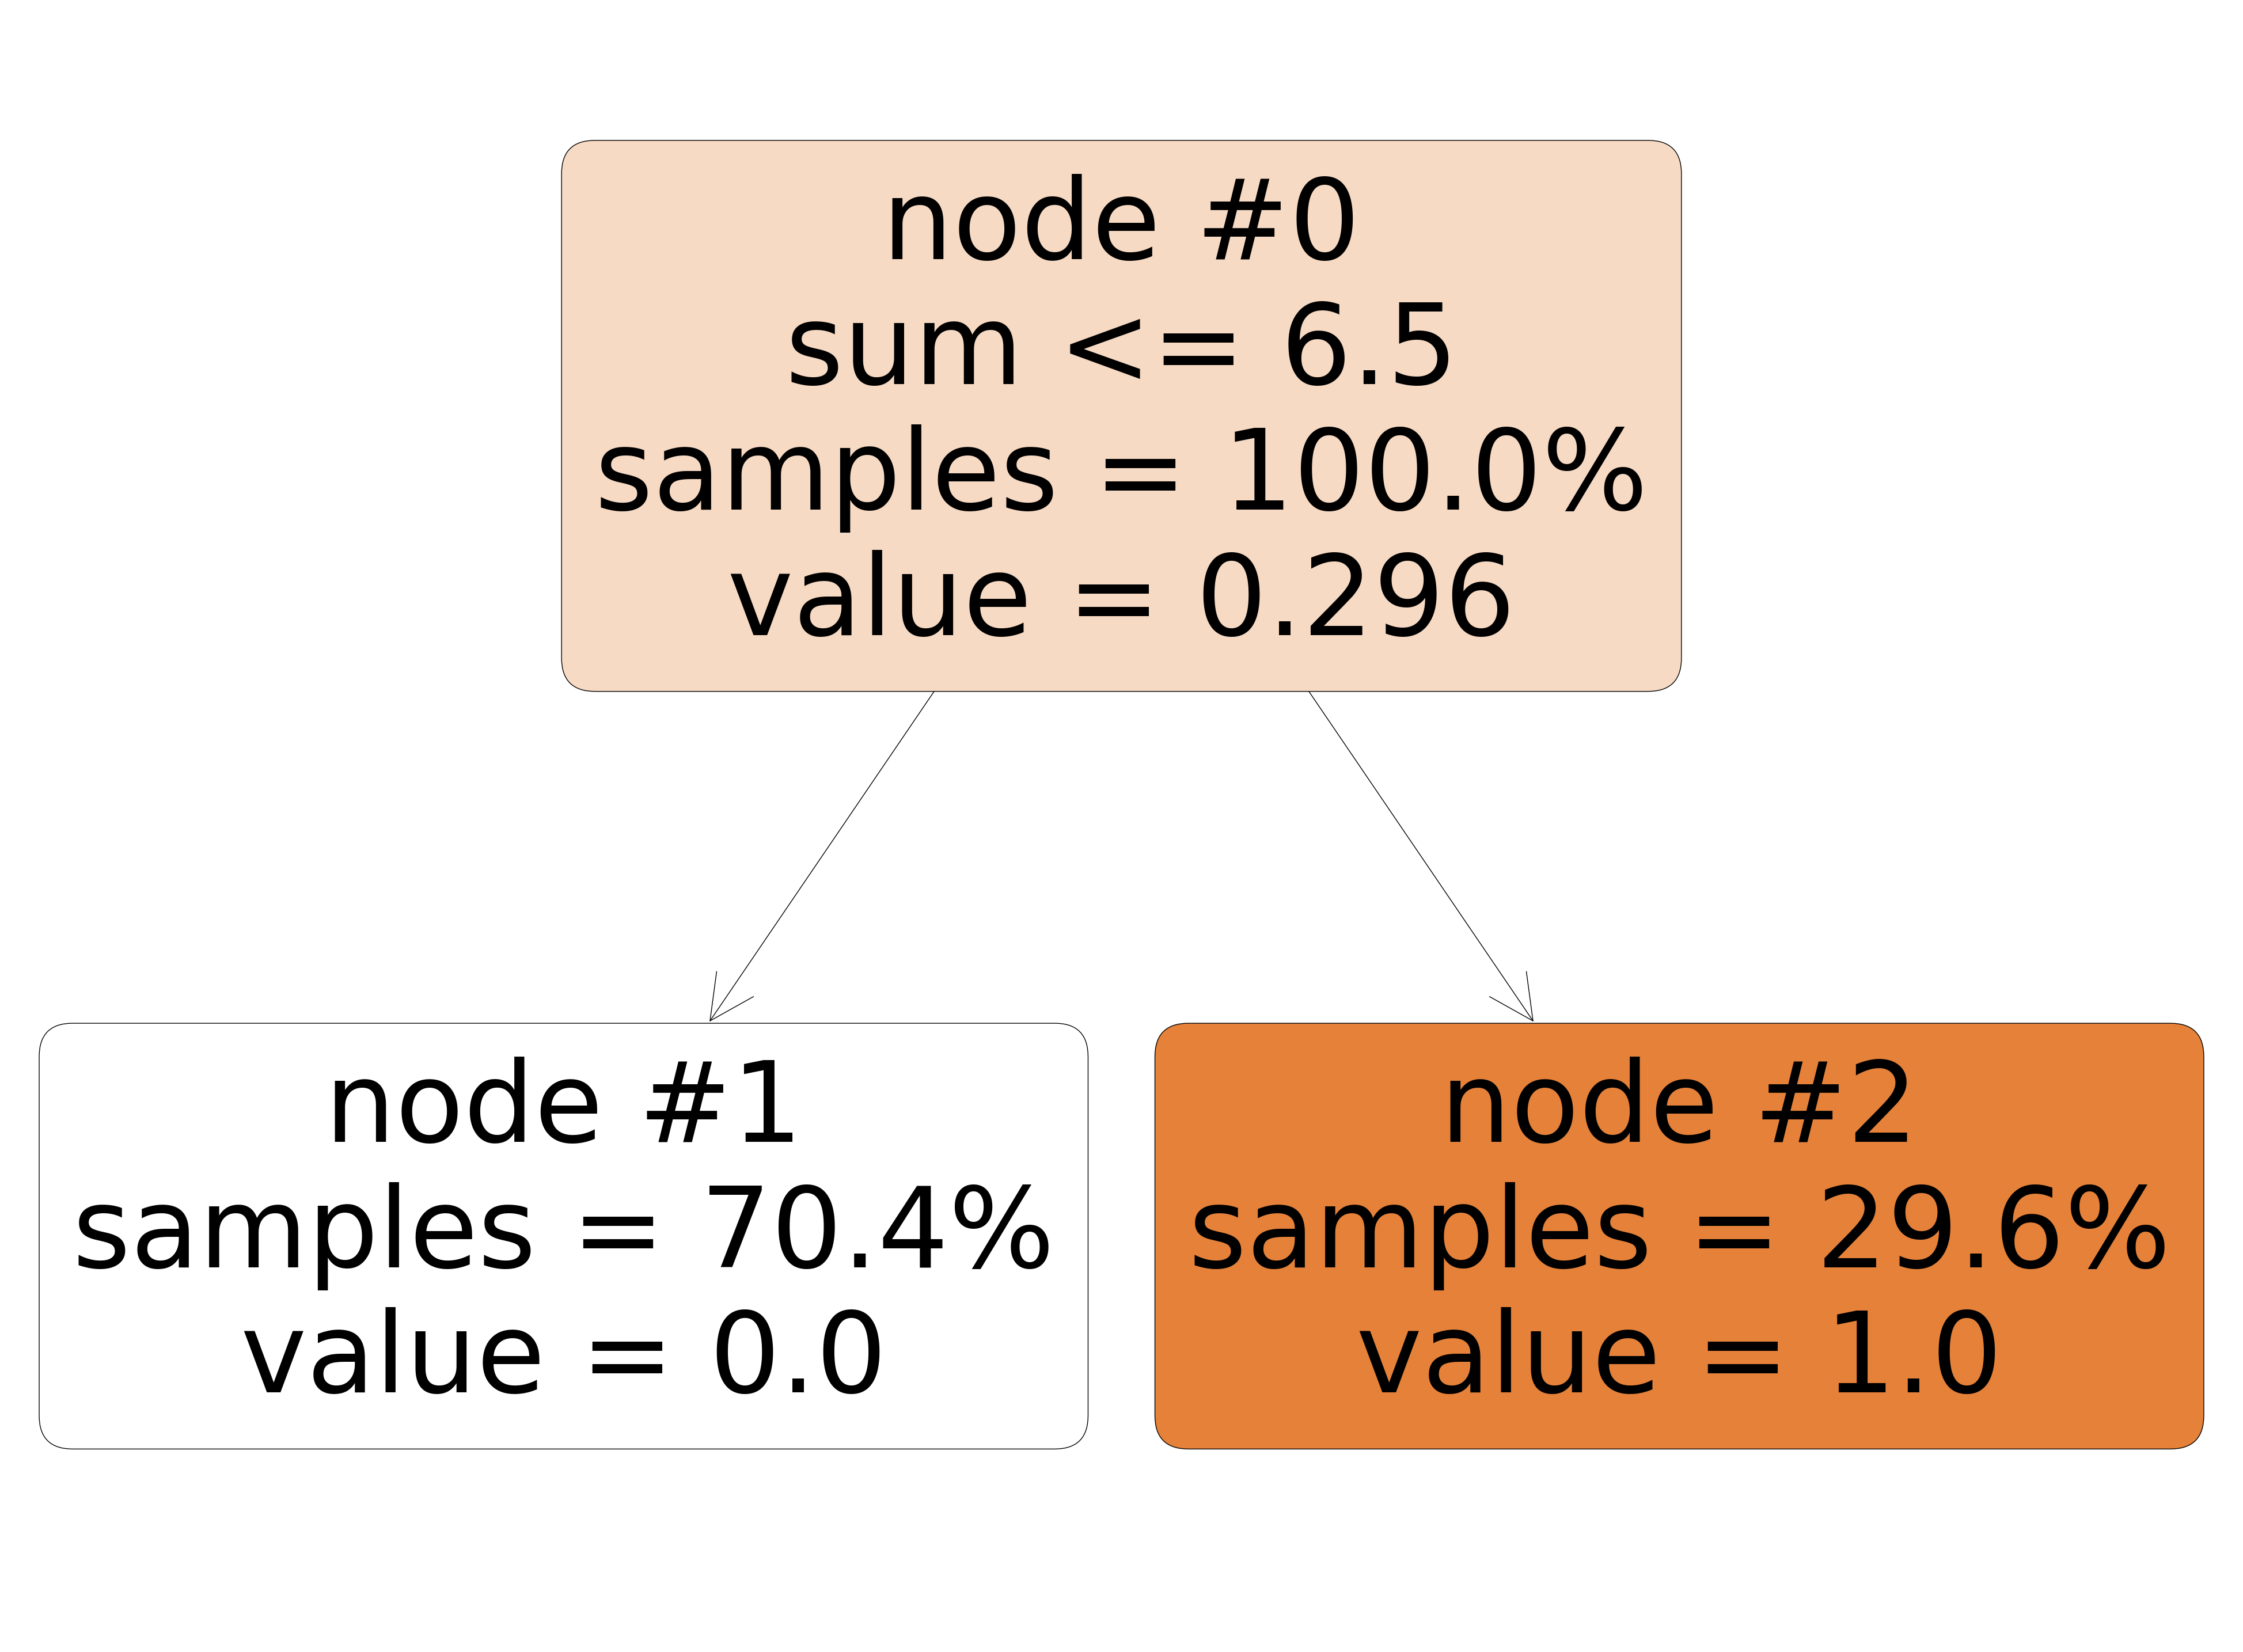

In [39]:
# Decision Trees
from sklearn.tree import DecisionTreeRegressor  

score_df = pd.read_csv("score.csv")

# Convert all the attributes' data type to numeric for Estimation 
score_df.loc[score_df['target'] == 'YES', "target"] = 1
score_df.loc[score_df['target'] == 'NO', "target"] = 0
score_df['target']=score_df['target'].astype('int64')

#The random state is a ransom seed number generator to ensure same order numbers.
#Using splitter=best, the model takes the feature with the highest importance 
min_sample = int(len(score_df) * 0.1)     # example of assigning the minimmum sample size

# create a decision tree regressor object
dtree_rg = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.005, #min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=min_sample,
                      min_weight_fraction_leaf=0.0, #presort='deprecated',
                      random_state=7, splitter='best') 

X = pd.get_dummies(score_df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']])
Y = score_df['target']

# split the data set to train (ratio of 0.8) and test sets (ratio of 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7) 

# fit the decision tree regressor
dtree_rg.fit(X_train, y_train)

#Predict the response for test dataset
y_predict = dtree_rg.predict(X_test)

# Calculating Mean squared error
print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, y_predict),5))

# plot tree
from sklearn import tree
from matplotlib import pyplot as plt
import os
plt.clf()
target = list(Y.unique())
feature_names = list(X.columns)
strFile = "plot_dtree.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
fig = plt.figure(figsize=(50,37))
_ = tree.plot_tree(dtree_rg, feature_names=feature_names, class_names=target, filled=True,
        label='all', node_ids=True, proportion=True,rounded=True, impurity=False)
fig.savefig(strFile)

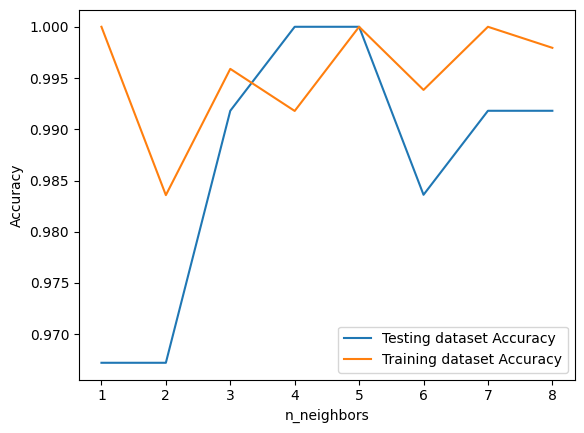

Train Accuracy:  0.997946611909651
Test Accuracy:  0.9918032786885246
Train size:  (487, 11) Test size:  (122, 11)


In [51]:
# KNN
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Loading data 
score_df = pd.read_csv("score.csv")

# Create feature and target arrays 
X = score_df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']]
y = score_df.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)  

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
    
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 


print("Train Accuracy: ", train_accuracy[-1])
print("Test Accuracy: ", test_accuracy[-1])
print("Train size: ", X_train.shape, "Test size: ", X_test.shape)

# cm = confusion_matrix(y_test, y_train)
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();


In [41]:
# SVM
# Load the important packages 
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt 
from sklearn.inspection import DecisionBoundaryDisplay 
from sklearn.svm import SVC 

# Load the datasets 
score_df = pd.read_csv("score.csv")
# X = score_df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']]
X = score_df.sum
y = score_df.target 

# Build the model 
svm = SVC(kernel="rbf", gamma=0.5, C=1.0) 

# Trained the model 
svm.fit(X, y) 

# Plot Decision Boundary 
DecisionBoundaryDisplay.from_estimator(
    svm, X, response_method="predict", 
    cmap=plt.cm.Spectral, 
    alpha=0.8, 
    xlabel=score_df.columns[-2], 
    ylabel=score_df.columns[-1], ) 

# # Scatter plot 
# plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k") 
# plt.show()

TypeError: float() argument must be a string or a real number, not 'method'

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Best hyperparameters: {'max_depth': 7, 'n_estimators': 236}


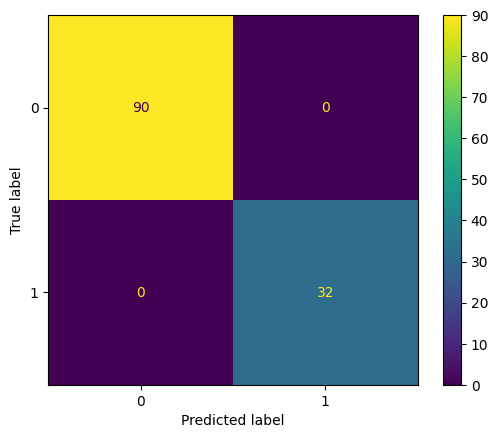

In [13]:
# Random Forest

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

score_df = pd.read_csv("score.csv")
score_df['target']=score_df['target'].map({'NO':0,'YES':1})

X = score_df.drop('target', axis=1)
# X = score_df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'sum']]
y = score_df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Export the first three decision trees from the forest
# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
    
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
